<a href="https://colab.research.google.com/github/Renad-CAI/T5_Labs/blob/main/Lab_exam_week_4_Task_1_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [189]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.


## Importing Libraries

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [191]:
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

In [192]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [194]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [195]:
df.drop(columns= ['Occurred_On', 'Created_On', 'Informed_On', 'Last_Updated_On'], inplace= True)

In [196]:
categorical_col = df.select_dtypes(include= ['object'])
num_col = df.select_dtypes(include= ['number'])

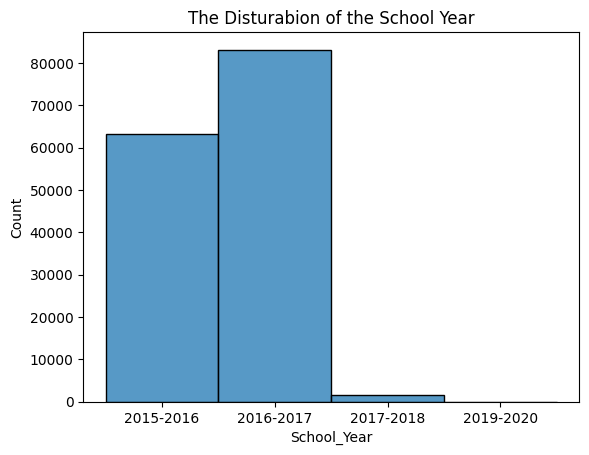

In [197]:
sns.histplot(data= df, x= df['School_Year'])
plt.title(f'The Disturabion of the School Year')
plt.show()

<Axes: >

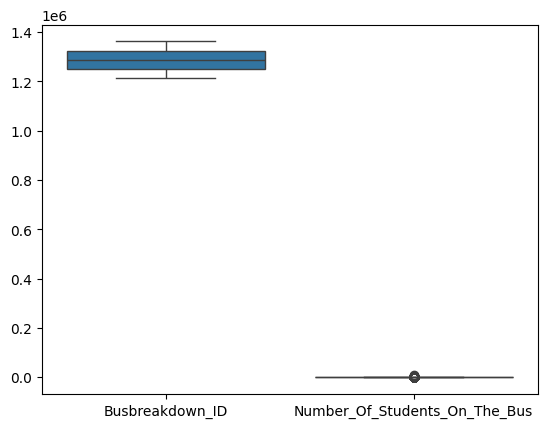

In [198]:
sns.boxplot(data = df)

<Axes: >

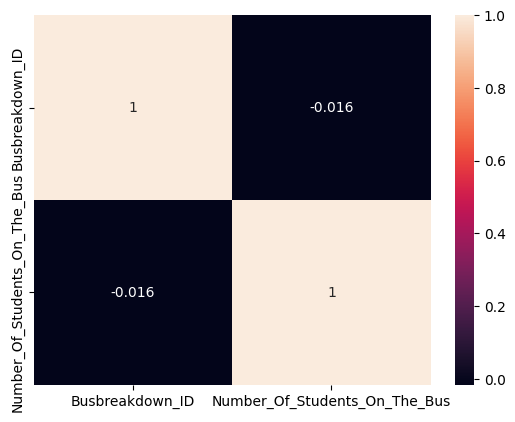

In [199]:
correlation_metrix = num_col.corr()

sns.heatmap(data = correlation_metrix, annot= True)

In [200]:
# we see the data is imbalanced

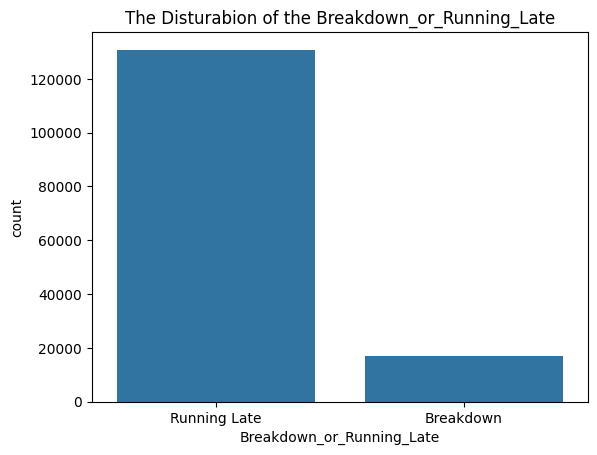

In [201]:
sns.countplot(data= df, x= df['Breakdown_or_Running_Late'])
plt.title(f'The Disturabion of the Breakdown_or_Running_Late')
plt.show()

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [202]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Boro,6318
Bus_Company_Name,0
How_Long_Delayed,21630


In [203]:
for col in df:
  print(df[col].unique())
  print('-----------------------------------')

['2015-2016' '2016-2017' '2017-2018' '2019-2020']
-----------------------------------
[1224901 1225098 1215800 ... 1353044 1353045 1353046]
-----------------------------------
['Pre-K/EI' 'Special Ed AM Run' 'General Ed AM Run' 'Special Ed PM Run'
 'General Ed PM Run' 'Special Ed Field Trip' 'General Ed Field Trip' nan
 'Project Read PM Run' 'Project Read AM Run' 'Project Read Field Trip']
-----------------------------------
['811' '9302' '358' ... '0096' 'GVC510' 'K9345']
-----------------------------------
['1' '2' 'P640' ... '012' '29AM' '1409B']
-----------------------------------
['Other' 'Heavy Traffic' 'Flat Tire' 'Mechanical Problem'
 'Delayed by School' 'Problem Run' 'Late return from Field Trip'
 'Won`t Start' 'Weather Conditions' 'Accident' nan]
-----------------------------------
['C353' 'C814' 'C195' ... 'C148' '02654, 02721,' '04377, 04454, 04658']
-----------------------------------
['Bronx' nan 'Queens' 'Brooklyn' 'Nassau County' 'Manhattan' 'Westchester'
 'Staten Islan

In [204]:
for col in df:
  df = df.replace('Other', np.nan)

In [205]:
df.head(10)

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Incident_Number,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,NaN,C353,Bronx,"G.V.C., LTD.",10MINUTES,5,Yes,Yes,No,NaN,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,Bronx,"G.V.C., LTD.",25 MINUTES,3,Yes,Yes,No,NaN,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,Bronx,"G.V.C., LTD.",15 MINUTES,12,Yes,Yes,Yes,NaN,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,NaN,C178,Bronx,"G.V.C., LTD.",10 minutes,11,Yes,Yes,Yes,NaN,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,NaN,S176,Bronx,"G.V.C., LTD.",10MINUTES,12,Yes,Yes,No,NaN,Running Late,Pre-K
5,2015-2016,1225671,Special Ed AM Run,12568,P640,Heavy Traffic,24071,NaN,ACME BUS CORP. (B2321),15mins,3,Yes,Yes,Yes,NaN,Running Late,School-Age
6,2015-2016,1226116,Pre-K/EI,9304,4,Heavy Traffic,C353,Bronx,"G.V.C., LTD.",20MIN,3,Yes,Yes,Yes,NaN,Running Late,Pre-K
7,2015-2016,1214953,Pre-K/EI,GV0365,3,Heavy Traffic,C579,Bronx,"G.V.C., LTD.",10MIN,4,Yes,Yes,No,NaN,Running Late,Pre-K
8,2015-2016,1215730,Special Ed AM Run,5628D,Q363,Heavy Traffic,26177,Queens,LORINDA ENT. LTD.,45MINS,0,Yes,Yes,No,NaN,Running Late,School-Age
9,2015-2016,1226326,Pre-K/EI,0003,03 AM,NaN,C494,Brooklyn,L & M BUS CORP.,35 Minutes,0,Yes,Yes,No,NaN,Running Late,Pre-K


In [206]:
df['Run_Type'] = df['Run_Type'].fillna(df['Run_Type'].mode()[0])

In [207]:
df['Route_Number'] = df['Route_Number'].fillna('Unknown')

In [208]:
df['Reason'] = df['Reason'].fillna(df['Reason'].mode()[0])

In [209]:
df['Boro'] = df['Boro'].fillna(df['Boro'].mode()[0])

In [210]:
df['How_Long_Delayed'] = df['How_Long_Delayed'].fillna(method= 'bfill')

<ipython-input-210-5234fb4914b4>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['How_Long_Delayed'] = df['How_Long_Delayed'].fillna(method= 'bfill')


In [211]:
df.drop(columns= 'Incident_Number', inplace = True)

In [212]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Boro,0
Bus_Company_Name,0
How_Long_Delayed,0


In [213]:
df.duplicated().sum()

0

In [214]:
categorical_col.head()

,School_Year,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Boro,Bus_Company_Name,How_Long_Delayed,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Incident_Number,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,Pre-K/EI,811,1,Other,C353,Bronx,"G.V.C., LTD.",10MINUTES,Yes,Yes,No,NaN,Running Late,Pre-K
1,2015-2016,Pre-K/EI,9302,1,Heavy Traffic,C814,Bronx,"G.V.C., LTD.",25 MINUTES,Yes,Yes,No,NaN,Running Late,Pre-K
2,2015-2016,Pre-K/EI,358,2,Heavy Traffic,C195,Bronx,"G.V.C., LTD.",15 MINUTES,Yes,Yes,Yes,NaN,Running Late,Pre-K
3,2015-2016,Pre-K/EI,331,2,Other,C178,Bronx,"G.V.C., LTD.",10 minutes,Yes,Yes,Yes,NaN,Running Late,Pre-K
4,2015-2016,Pre-K/EI,332,2,Other,S176,Bronx,"G.V.C., LTD.",10MINUTES,Yes,Yes,No,NaN,Running Late,Pre-K


In [215]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['How_Long_Delayed'] = encoder.fit_transform(df['How_Long_Delayed'])
df['Breakdown_or_Running_Late'] = encoder.fit_transform(df['Breakdown_or_Running_Late'])
df['Has_Contractor_Notified_Schools'] = encoder.fit_transform(df['Has_Contractor_Notified_Schools'])
df['Has_Contractor_Notified_Parents'] = encoder.fit_transform(df['Has_Contractor_Notified_Parents'])
df['Have_You_Alerted_OPT'] = encoder.fit_transform(df['Have_You_Alerted_OPT'])
df['Run_Type'] = encoder.fit_transform(df['Run_Type'])
df['Bus_No'] = encoder.fit_transform(df['Bus_No'])
df['Route_Number'] = encoder.fit_transform(df['Route_Number'])
df['Reason'] = encoder.fit_transform(df['Reason'])
df['Schools_Serviced'] = encoder.fit_transform(df['Schools_Serviced'])
df['School_Year'] = encoder.fit_transform(df['School_Year'])
df['Boro'] = encoder.fit_transform(df['Boro'])
df['Bus_Company_Name'] = encoder.fit_transform(df['Bus_Company_Name'])
df['School_Age_or_PreK'] = encoder.fit_transform(df['School_Age_or_PreK'])

In [216]:
# The order is not important for these columns, that is why I used the One Hot encoder, but it will give
# so much data (a lot of new columns), and the RAM is crached every time I run it
# so I use the label encoder insted in above code

'''
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False)

encode_Run_Type = encoder.fit_transform(df[['Run_Type']])
encode_Run_Type_df = pd.DataFrame(encode_Run_Type, columns= encoder.get_feature_names_out(['Run_Type']))
encode_Bus_No = encoder.fit_transform(df[['Bus_No']])
encode_Bus_No_df = pd.DataFrame(encode_Bus_No, columns= encoder.get_feature_names_out(['Bus_No']))
encode_Route_Number = encoder.fit_transform(df[['Route_Number']])
encode_Route_Number_df = pd.DataFrame(encode_Route_Number, columns= encoder.get_feature_names_out(['Route_Number']))
encode_Reason = encoder.fit_transform(df[['Reason']])
encode_Reason_df = pd.DataFrame(encode_Reason, columns= encoder.get_feature_names_out(['Reason']))
encode_Schools_Serviced = encoder.fit_transform(df[['Schools_Serviced']])
encode_Schools_Serviced_df = pd.DataFrame(encode_Schools_Serviced, columns= encoder.get_feature_names_out(['Schools_Serviced']))
encode_School_Year = encoder.fit_transform(df[['School_Year']])
encode_School_Year_df = pd.DataFrame(encode_School_Year, columns= encoder.get_feature_names_out(['School_Year']))
encode_Boro = encoder.fit_transform(df[['Boro']])
encode_Boro_df = pd.DataFrame(encode_Boro, columns= encoder.get_feature_names_out(['Boro']))
encode_Bus_Company_Name = encoder.fit_transform(df[['Bus_Company_Name']])
encode_Bus_Company_Name_df = pd.DataFrame(encode_Bus_Company_Name, columns= encoder.get_feature_names_out(['Bus_Company_Name']))
encode_School_Age_or_PreK = encoder.fit_transform(df[['School_Age_or_PreK']])
encode_School_Age_or_PreK_df = pd.DataFrame(encode_School_Age_or_PreK, columns= encoder.get_feature_names_out(['School_Age_or_PreK']))

df = pd.concat([df, encode_Run_Type_df, encode_Bus_No_df, encode_Route_Number_df, encode_Reason_df, encode_Schools_Serviced_df, encode_School_Year_df, encode_Boro_df, encode_Bus_Company_Name_df, encode_School_Age_or_PreK_df], axis= 1).drop(columns= ['Run_Type', 'Bus_No','Route_Number', 'Reason', 'Schools_Serviced', 'School_Year', 'Boro', 'Bus_Company_Name', 'School_Age_or_PreK'], inplace = True)

'''

"\nfrom sklearn.preprocessing import OneHotEncoder\n\nencoder = OneHotEncoder(sparse = False)\n\nencode_Run_Type = encoder.fit_transform(df[['Run_Type']])\nencode_Run_Type_df = pd.DataFrame(encode_Run_Type, columns= encoder.get_feature_names_out(['Run_Type']))\nencode_Bus_No = encoder.fit_transform(df[['Bus_No']])\nencode_Bus_No_df = pd.DataFrame(encode_Bus_No, columns= encoder.get_feature_names_out(['Bus_No']))\nencode_Route_Number = encoder.fit_transform(df[['Route_Number']])\nencode_Route_Number_df = pd.DataFrame(encode_Route_Number, columns= encoder.get_feature_names_out(['Route_Number']))\nencode_Reason = encoder.fit_transform(df[['Reason']])\nencode_Reason_df = pd.DataFrame(encode_Reason, columns= encoder.get_feature_names_out(['Reason']))\nencode_Schools_Serviced = encoder.fit_transform(df[['Schools_Serviced']])\nencode_Schools_Serviced_df = pd.DataFrame(encode_Schools_Serviced, columns= encoder.get_feature_names_out(['Schools_Serviced']))\nencode_School_Year = encoder.fit_trans

In [217]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK
0,0,1224901,3,7481,77,3,5003,1,27,191,5,1,1,0,1,0
1,0,1225098,3,8114,77,3,5071,1,27,837,3,1,1,0,1,0
2,0,1215800,3,4662,209,3,4969,1,27,335,12,1,1,1,1,0
3,0,1215511,3,4547,209,3,4968,1,27,110,11,1,1,1,1,0
4,0,1215828,3,4554,209,3,5149,1,27,191,12,1,1,0,1,0


## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [218]:
X= df.drop(columns= 'Breakdown_or_Running_Late', axis = 1)
y = df['Breakdown_or_Running_Late']

In [234]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size= 0.2, random_state= 42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size= 0.5, random_state= 42)

In [235]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
X_val_sc = scaler.transform(X_val)

In [221]:
!pip install imbalanced-learn

In [236]:
from imblearn.over_sampling import SMOTE

balnced = SMOTE()
X_train_smote, y_train_smote = balnced.fit_resample(X_train_sc, y_train)


## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [224]:
import tensorflow as tf
from tensorflow.keras import models, layers

In [237]:
model = models.Sequential()
model.add(layers.Dense(32, activation="relu", input_shape= (X_train.shape[1],)))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [238]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                     │ (None, 32)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,641 (111.88 KB)

 Trainable params: 28,641 (111.88 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [240]:
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [241]:
history = model.fit(X_train_smote, y_train_smote, validation_data = (X_val_sc, y_val),epochs= 10)

Epoch 1/10
6538/6538 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8122 - loss: 0.4226 - val_accuracy: 0.8524 - val_loss: 0.3394
Epoch 2/10
6538/6538 ━━━━━━━━━━━━━━━━━━━━ 46s 7ms/step - accuracy: 0.8870 - loss: 0.2859 - val_accuracy: 0.8294 - val_loss: 0.4050
Epoch 3/10
6538/6538 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.8994 - loss: 0.2609 - val_accuracy: 0.8228 - val_loss: 0.4035
Epoch 4/10
6538/6538 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.9033 - loss: 0.2517 - val_accuracy: 0.8227 - val_loss: 0.4102
Epoch 5/10
6538/6538 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.9061 - loss: 0.2431 - val_accuracy: 0.8221 - val_loss: 0.4507
Epoch 6/10
6538/6538 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9059 - loss: 0.2442 - val_accuracy: 0.8655 - val_loss: 0.3396
Epoch 7/10
6538/6538 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - accuracy: 0.9078 - loss: 0.2392 - val_accuracy: 0.8294 - val_loss: 0.4252
Epoch 8/10
6538/6538 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.9094 - loss: 0

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [242]:
loss, acc = model.evaluate(X_test_sc, y_test)
print('The Accuracy is: ', acc*100)
print('The Loss is: ', loss)

463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8637 - loss: 0.3674
The Accuracy is:  86.37561798095703
The Loss is:  0.37073951959609985


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [245]:
from sklearn.metrics import accuracy_score, recall_score

y_pred_test = model.predict(X_test_sc)
print(y_pred_test)

463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
[[0.9903964 ]
 [0.49736083]
 [0.018954  ]
 ...
 [0.8310485 ]
 [0.919368  ]
 [0.5275588 ]]


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

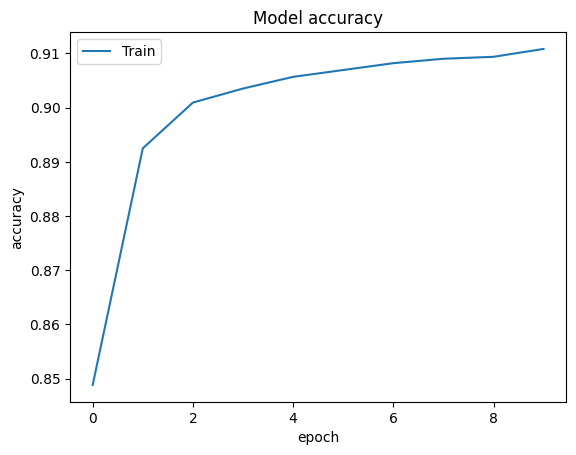

In [246]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

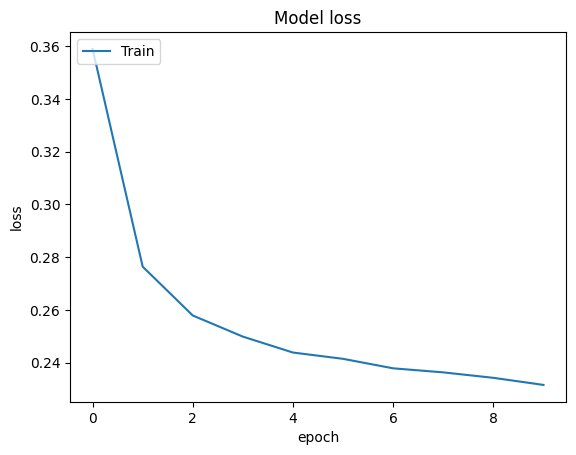

In [247]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

## Save the Model
Save the trained model for submission.

In [248]:
model.save('ANN_Model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

Q1: Data Preprocessing: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?

I do the encoding becuse I have categorical data and the model take just the numrical data.

Q2: Model Architecture: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?

the the number of layers is : 6 layers

type of layers is Dense witch is fully connected layer

activation functions is relu

the architecture is good and simple in the one time

Q3: Training Process: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?

the batch size is 32 and it is good for the number of my data, the optimizer is adam and the last activation funcation is sigmoid, becuse it good for the binary classification task

Q4: Loss Function and Metrics: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?

I evalute the model by the accuracy and loss (the error)

Q5: Regularization Techniques: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.

I used the Dropout for prevent the overfitting

Q: Overfitting and Underfitting: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

there is no overfitting and the model works good